In [1]:
import bia_bob

In [2]:
%%bob 
Please segment the nuclei in the `skimage.data.human_mitosis()` dataset using Voronoi-Otsu-Labeling.

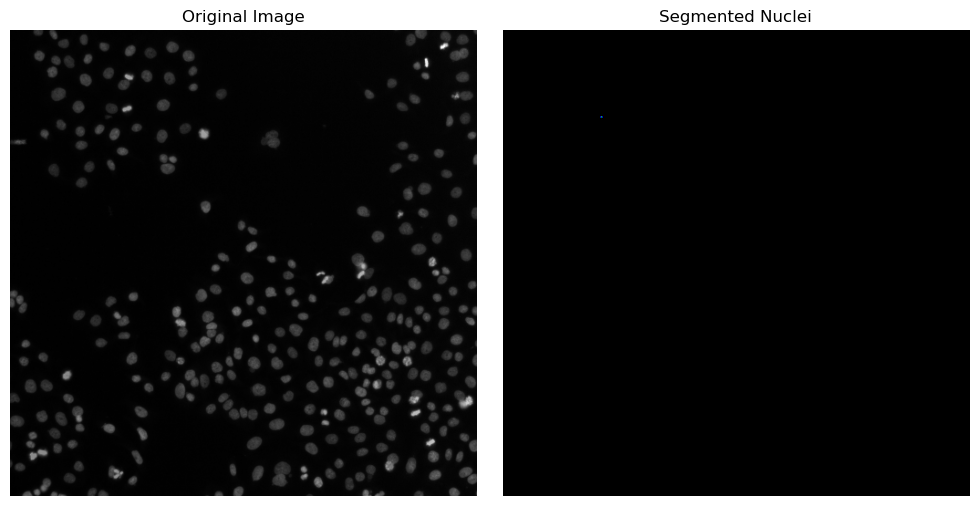

In [3]:
from skimage import data
from skimage.filters import threshold_otsu
from skimage.segmentation import watershed
from scipy import ndimage as ndi
import numpy as np
import matplotlib.pyplot as plt

# Load the human mitosis image
image = data.human_mitosis()

# Calculate the Otsu threshold
thresh = threshold_otsu(image)

# Create a binary mask
binary = image > thresh

# Calculate the distance transform
distance = ndi.distance_transform_edt(binary)

# Generate markers for the watershed
markers, _ = ndi.label(ndi.gaussian_filter(distance, sigma=3) < 0.1)

# Perform the Voronoi-Otsu-Labeling (Watershed segmentation)
labels = watershed(-distance, markers, mask=binary)

# Display the original and labeled images
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
ax = axes.ravel()

ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Image')

ax[1].imshow(labels, cmap='nipy_spectral')
ax[1].set_title('Segmented Nuclei')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()